# 回收對環保及可持續發展很重要”的同意程度 與 demographics (Age)

Model Summary:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.3736      0.101     33.391      0.000       3.174       3.574
Age_numeric     0.0537      0.038      1.395      0.165      -0.022       0.130

R-squared: 0.0152


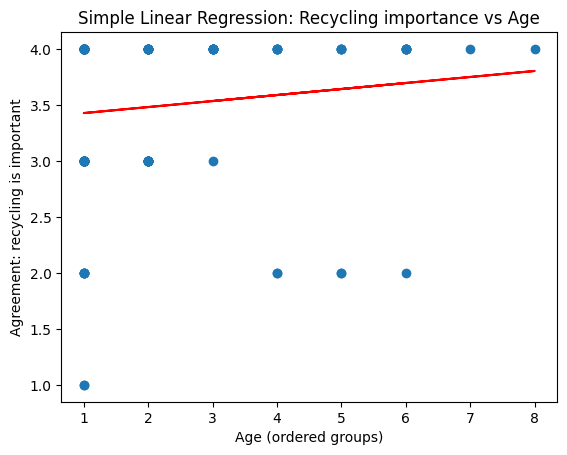

In [3]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# Prepare data
age_mapping = {
    '18 - 24': 1,
    '25 - 34': 2,
    '35 - 44': 3,
    '45 - 54': 4,
    '55 - 64': 5,
    '65 - 74': 6,
    '75 - 84': 7,
    '85 or above': 8
}

# Create ordered numeric age variable
df['Age_numeric'] = df['年齡  Age'].map(age_mapping)

# Target variable: agreement that recycling is important
agree_col = df.columns[1]  # "你多大程度同意「回收 對環保及可持續發展很重要」？ ..."

X3 = df[['Age_numeric']].dropna()
y3 = df.loc[X3.index, agree_col]

# Fit model using sklearn for predictions
lin_reg3 = LinearRegression()
lin_reg3.fit(X3, y3)

# Fit model using statsmodels for statistical tests
X3_sm = sm.add_constant(X3)  # Add constant term for intercept
model3 = sm.OLS(y3, X3_sm)
results3 = model3.fit()

# Predictions for plotting
y_pred3 = lin_reg3.predict(X3)

print("Model Summary:")
print(results3.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results3.rsquared:.4f}")

# Plot
plt.scatter(X3, y3)
plt.plot(X3, y_pred3, color='red')
plt.xlabel('Age (ordered groups)')
plt.ylabel('Agreement: recycling is important')
plt.title('Simple Linear Regression: Recycling importance vs Age')
plt.show()


**Age coefficient ($\hat \beta_1$) = 0.0537 (p = 0.17 > 0.05)**  

- There is **no statistically significant association** between age group and the level of agreement that recycling is important for environmental protection and sustainable development.  

- The **R-squared is very low (~0.02)**, meaning age explains only about **1–2% of the variation** in agreement; respondents across all age groups generally show similarly high support for the importance of recycling.
